<a href="https://colab.research.google.com/github/Marchbreeze/KU-Data-Science/blob/main/week5-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 트리 시각화 위한 라이브러리 설치
!pip install graphviz

In [2]:
# 주요 라이브러리 불러오기
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
# DataFrame 제어
df = pd.read_excel('telecom.xlsx')
df = pd.get_dummies(df, columns = ['Technology'])
df_x = df.iloc[:, [0, 1, 2, 4, 5, 6, 7]]
df_y = df['Leave']

In [5]:
# 의사결정 트리 생성
tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 3,
                                    min_samples_leaf = 5)
tree_model.fit(df_x, df_y)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

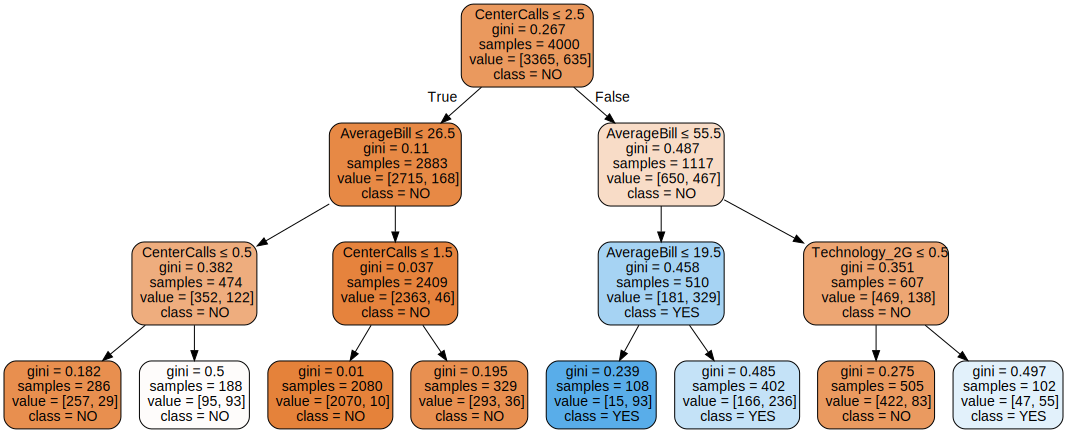

In [6]:
# 의사결정 트리 시각화
dot_data = export_graphviz(tree_model, out_file = None,
                           feature_names = df_x.columns,
                           class_names = tree_model.classes_,
                           filled = True, rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [7]:
# 생성된 의사결정 트리를 활용해 분류
df_predict = pd.read_excel('telecom_new.xlsx')
df_predict = pd.get_dummies(df_predict, columns = ['Technology'])

tree_prediction = tree_model.predict(df_predict)
tree_prediction

array(['NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES'], dtype=object)